In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflo

In [2]:
base = pd.read_csv("petr4-treinamento.csv")
base = base.dropna()

#Agora são duas saídas, coluna 'Open' para predizer 'Open' e 'Close'

base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

In [3]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [4]:
previsores = []
preco_real1 = []
preco_real2 = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real1.append(base_treinamento_normalizada[i, 0])
    preco_real2.append(base_valor_maximo_normalizada[i, 0])
    
previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)

In [5]:
previsores.shape

(1152, 90)

In [6]:
# Colocando no formato input_gate(batch size, timesteps, input_dim)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1152, 90, 1)

In [7]:
# Juntas em uma variavel, as duas que serão preditas
preco_real = np.column_stack((preco_real1, preco_real2))
preco_real

array([[0.76114341, 0.76490543],
       [0.76114341, 0.7746001 ],
       [0.77470935, 0.78090155],
       ...,
       [0.57122093, 0.57537562],
       [0.57655039, 0.57489089],
       [0.57655039, 0.57343674]])

In [8]:
regressor = Sequential()

# 1 atributo referente ao previsor que é a variavel 'Open'
regressor.add(LSTM(units = 100, return_sequences = True, input_shape =(previsores.shape[1], 1) ))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

# São duas variaveis a serem preditas e a ativação também poderia ser 'sigmoid'
regressor.add(Dense(units = 2, activation = 'linear'))

W0906 11:06:02.112589 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 11:06:02.136033 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 11:06:02.141235 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 11:06:02.411646 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_w

In [9]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                        metrics = ['mean_absolute_error'])

W0906 11:06:03.172108 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

W0906 11:06:03.450841 139788520843072 deprecation.py:323] From /home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 11:06:05.992391 139788520843072 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.1417
Epoch 2/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.1060
Epoch 3/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0938
Epoch 4/100
1152/1152 [==============================] - 6s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0853
Epoch 5/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0821
Epoch 6/100
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0808
Epoch 7/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0086 - mean_absolute_error: 0.0706
Epoch 8/100
1152/1152 [==============================] - 10s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0713
Epoch 9/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0083 

1152/1152 [==============================] - 11s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0322
Epoch 73/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 74/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0314
Epoch 75/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0313
Epoch 76/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0316
Epoch 77/100
1152/1152 [==============================] - 10s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0305
Epoch 78/100
1152/1152 [==============================] - 9s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0316
Epoch 79/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0297
Epoch 80/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0018 - mean

In [11]:
base_teste = pd.read_csv('petr4-teste.csv')

preco_real_open = base_teste.iloc[:, 1:2].values
preco_real_high = base_teste.iloc[:, 2:3].values

In [12]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

In [13]:
X_test = []

for i in range(90,112):
    X_test.append(entradas[i-90:i, 0])
    

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
previsoes = regressor.predict(X_test)
previsoes = normalizador.inverse_transform(previsoes)

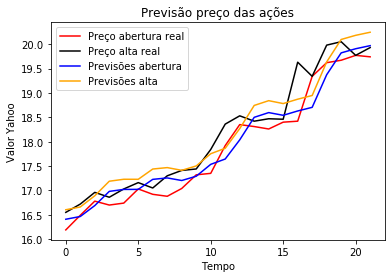

In [15]:
plt.plot(preco_real_open, color = 'red', label = 'Preço abertura real')
plt.plot(preco_real_high, color = 'black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões alta')

plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()